<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Kmeans/Modelos_Hier%C3%A1quicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# visualização em machine learning

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv", index_col=0)


df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


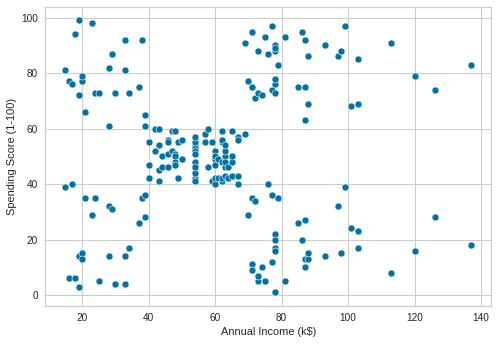

In [16]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [17]:
scaler = StandardScaler()


scaler.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

X_std = scaler.transform(df[['Annual Income (k$)','Spending Score (1-100)']])

X = X_std

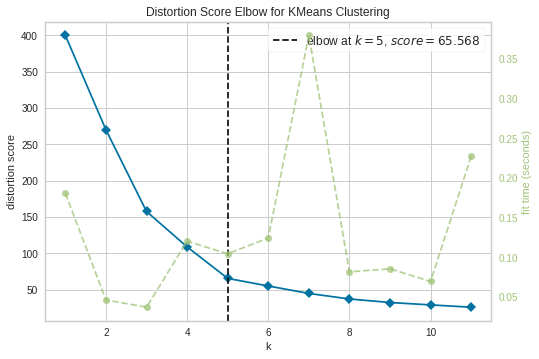

In [18]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit os dados para o visualizer
visualizer.show()

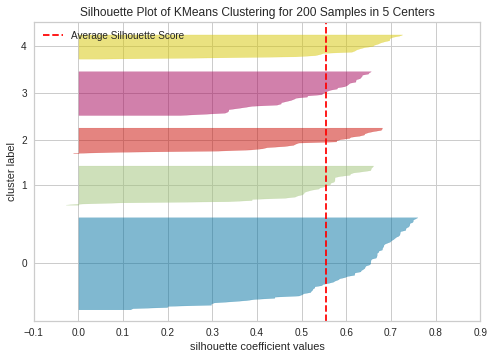

In [19]:
model = KMeans(5).fit(X)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X) 
      
visualizer.show()

# Cluster Hierárquico

*Dendograma*

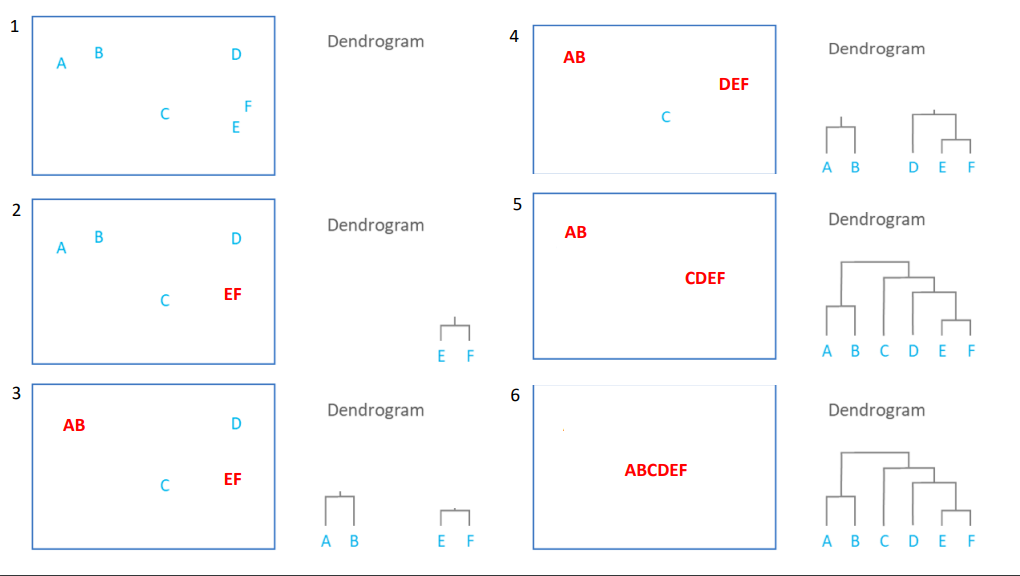

# Linkage

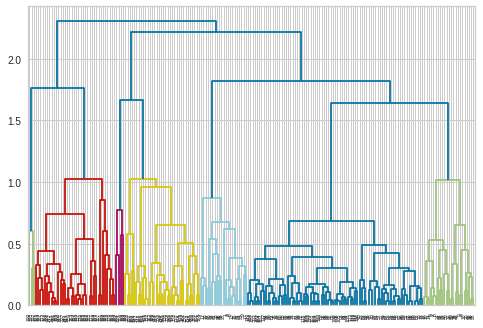

In [28]:
from scipy.cluster import hierarchy

dendogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))

In [29]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(5, linkage='complete',affinity='euclidean')

hierarchical.fit(X)
hierarchical.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [30]:
df['Clusters'] = hierarchical.labels_

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,3
3,Female,20,16,6,1
4,Female,23,16,77,3
5,Female,31,17,40,1


In [33]:
df.groupby('Clusters').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,40.394737,87.000000,18.631579
3,25.333333,25.095238,80.047619
4,42.886076,54.417722,50.215190
